<a href="https://colab.research.google.com/github/asheta66/CNN/blob/main/BC_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

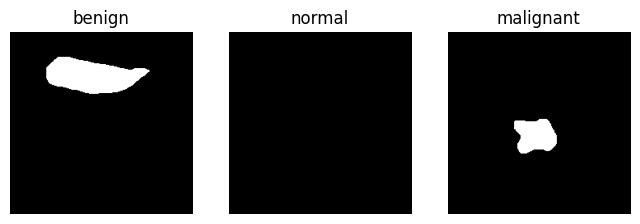

In [62]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from google.colab import drive
from PIL import Image

# # 1. Mount data from Google Drive
# drive.mount('/content/drive')

# Define your data directory path
data_dir = '/content/drive/My Drive/data2'

# 2. Display a sample of data from each subfolder with their appropriate title
classes = [cls for cls in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, cls))]

plt.figure(figsize=(8, 8))
for i, cls in enumerate(classes):
    cls_dir = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(cls_dir))
    img_path = os.path.join(cls_dir, img_file)
    img = load_img(img_path)
    plt.subplot(len(classes) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

In [63]:
# 3. Get the number of classes and the number of images in each class
num_classes = len(classes)
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print("Number of classes:", num_classes)
print("Number of images in each class:", class_counts)

Number of classes: 3
Number of images in each class: {'benign': 891, 'normal': 266, 'malignant': 421}


In [64]:
# # 4. Resize the image sizes to 227x227x3
# def resize_images(directory, size=(227, 227)):
#     for cls in classes:
#         cls_dir = os.path.join(directory, cls)
#         for img_file in os.listdir(cls_dir):
#             img_path = os.path.join(cls_dir, img_file)
#             try:
#                 img = Image.open(img_path)
#                 img = img.resize(size)
#                 img.save(img_path)  # overwrite original image with resized image
#             except (IOError, UnidentifiedImageError):
#                 print(f"Could not process file {img_path}")

# resize_images(data_dir)

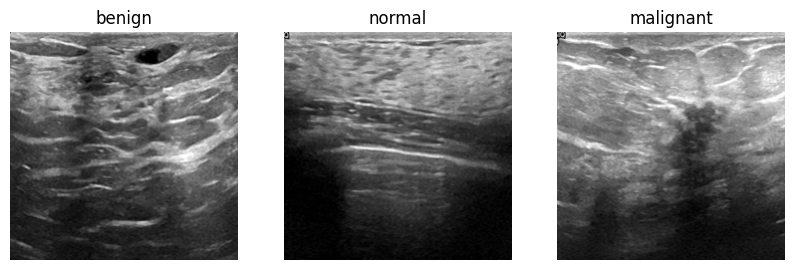

In [65]:
# 5. Display a sample of data from each subfolder with their appropriate title after the resize
plt.figure(figsize=(10, 10))
for i, cls in enumerate(classes):
    cls_dir = os.path.join(data_dir, cls)
    img_file = random.choice(os.listdir(cls_dir))
    img_path = os.path.join(cls_dir, img_file)
    img = load_img(img_path)
    plt.subplot(len(classes) // 3 + 1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

In [66]:
# 6. Split the data into training and testing with a ratio of 80 and 20
X, y = [], []
label_map = {cls: idx for idx, cls in enumerate(classes)}

for cls in classes:
    cls_dir = os.path.join(data_dir, cls)
    for img_file in os.listdir(cls_dir):
        img_path = os.path.join(cls_dir, img_file)
        img = load_img(img_path)
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label_map[cls])

X = np.array(X).astype('float32') / 255.0
y = np.array(y).astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [67]:
# 7. Build a CNN structure with five layers
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [68]:
# 8. Define the layers of the convolutional neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 9. Train the network
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
37/37 [==============================] - 71s 2s/step - loss: 0.9093 - accuracy: 0.5579 - val_loss: 0.7534 - val_accuracy: 0.6709
Epoch 2/10
37/37 [==============================] - 69s 2s/step - loss: 0.6613 - accuracy: 0.7236 - val_loss: 0.6866 - val_accuracy: 0.7013
Epoch 3/10
37/37 [==============================] - 71s 2s/step - loss: 0.4549 - accuracy: 0.8115 - val_loss: 0.7820 - val_accuracy: 0.6911
Epoch 4/10
37/37 [==============================] - 67s 2s/step - loss: 0.3758 - accuracy: 0.8622 - val_loss: 0.7254 - val_accuracy: 0.7519
Epoch 5/10
37/37 [==============================] - 63s 2s/step - loss: 0.2290 - accuracy: 0.9104 - val_loss: 0.9000 - val_accuracy: 0.7570
Epoch 6/10
37/37 [==============================] - 74s 2s/step - loss: 0.1264 - accuracy: 0.9527 - val_loss: 0.9017 - val_accuracy: 0.7595
Epoch 7/10
37/37 [==============================] - 70s 2s/step - loss: 0.0773 - accuracy: 0.9738 - val_loss: 1.0517 - val_accuracy: 0.7570
Epoch 8/10
37/37 [==

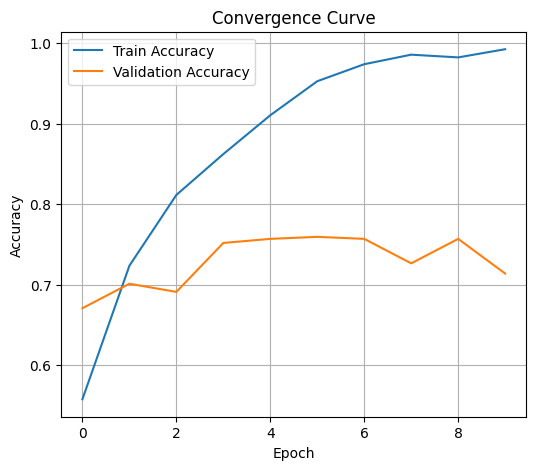

In [69]:
# 10. Draw the convergence curve
plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Convergence Curve')
plt.grid()
plt.show()


In [70]:
# 11. Compute confusion matrix for training and validation sets
train_predictions = model.predict(X_train).argmax(axis=1)
test_predictions = model.predict(X_test).argmax(axis=1)

cm_train = confusion_matrix(y_train, train_predictions)
cm_test = confusion_matrix(y_test, test_predictions)

13/13 [==============================] - 7s 509ms/step


In [ ]:
# 12. Compute precision, recall, and F1 scores for training sets and testing cases. Put it in a table.
print("Training Classification Report")
print(classification_report(y_train, train_predictions, target_names=classes))

print("Testing Classification Report")
print(classification_report(y_test, test_predictions, target_names=classes))

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrices(cm_train, cm_test, classes, title_train, title_test, filename):
    fig, axes = plt.subplots(1, 2, figsize=(8, 6))

    # Plot training confusion matrix
    ax = axes[0]
    ax.matshow(cm_train, cmap=plt.cm.Blues)
    ax.set_title(r'' + title_train + '', fontsize=10)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, fontsize=10)
    ax.set_yticklabels(classes, fontsize=10)

    fmt = 'd'
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        ax.text(j, i, format(cm_train[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm_train[i, j] > thresh else "black",
                fontsize=10)

    ax.set_ylabel(r'True label', fontsize=10)
    ax.set_xlabel(r'Predicted label', fontsize=10)

    # Plot testing confusion matrix
    ax = axes[1]
    ax.matshow(cm_test, cmap=plt.cm.Blues)
    ax.set_title(r'' + title_test + '', fontsize=10)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, fontsize=10)
    ax.set_yticklabels(classes, fontsize=10)

    fmt = 'd'
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        ax.text(j, i, format(cm_test[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm_test[i, j] > thresh else "black",
                fontsize=10)

    ax.set_ylabel(r'True label', fontsize=10)
    ax.set_xlabel(r'Predicted label', fontsize=10)

    plt.tight_layout()
    plt.grid(False)
    plt.savefig(filename)
    plt.show()

# Define the classes
classes = ["benign", "malignant", "normal"]

# Plotting and saving the confusion matrices for training and testing sets
plot_confusion_matrices(cm_train, cm_test, classes, 'Training Confusion Matrix', 'Testing Confusion Matrix', 'confusion_matrices.png')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 225, 225, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 64)       

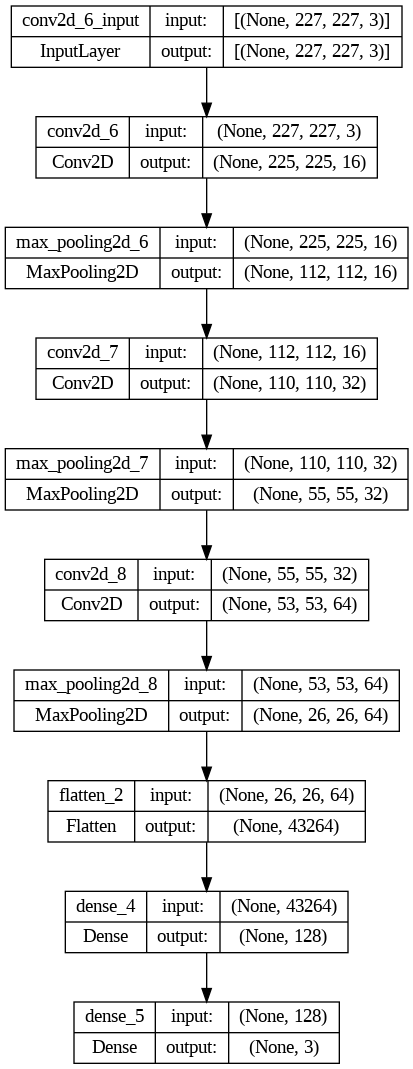

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 225, 225, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 110, 110, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 64)       

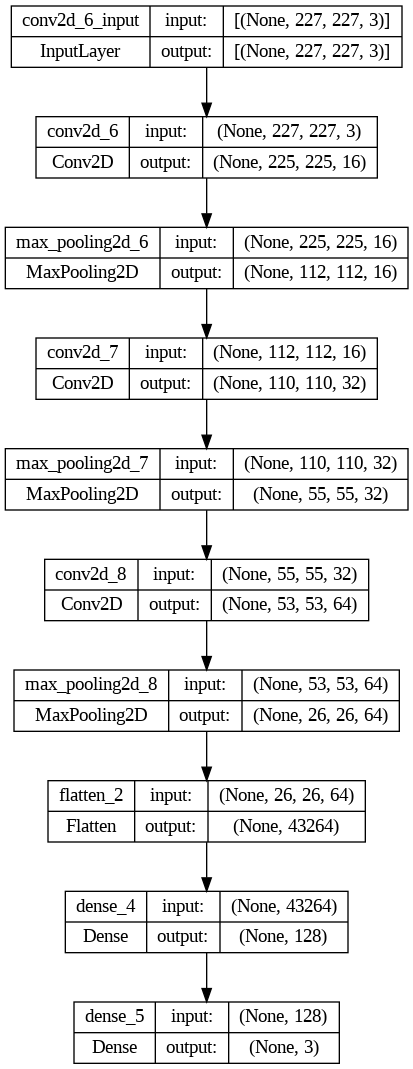

In [73]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Assuming you have already built and compiled your model
model.summary()

# Save the network structure as a PNG file
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Display the saved model structure
from IPython.display import Image
Image('model_structure.png')
